In [157]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as sp
import glob

images = glob.glob("images/*.tiff")

In [199]:
def plot_comparison(original, filtered, filter_name, orig_name='original'):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(orig_name)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

In [293]:
HIST_PLOT = False
HOUGH_PLOT = True
def manual_rotate_then_deskew(impath, manual_rotate):
    im = ski.io.imread(impath)
    im = ski.transform.resize(im, (im.shape[0] // 4, im.shape[1] // 4))

    X = im.shape[0]
    imrot = ski.transform.rotate(im, manual_rotate, resize=True)
    imrot = ski.util.crop(imrot, np.abs(np.ceil(X * np.sin(np.deg2rad(manual_rotate)))).astype(int))

    plt.figure()
    plot_comparison(im, imrot, 'rotation applied')
    plt.suptitle(impath)

    # # rs = ski.transform.resize(imrot, (imrot.shape[0] // 4, imrot.shape[1] // 4))
    rs = ski.filters.butterworth(imrot, cutoff_frequency_ratio=0.02, high_pass=False)
    rs = ski.exposure.equalize_hist(rs)
    rs = ski.filters.frangi(rs, sigmas=(4,))
    rs = ski.util.crop(rs, 100)
    rs = ski.exposure.rescale_intensity(rs, out_range=(0, 1))
    rs = (rs > 0.1) & (rs < 0.3)

    hspace, angles, distances = ski.transform.hough_line(rs)
    _, angles, distances = ski.transform.hough_line_peaks(hspace, angles, distances, threshold=0.7*np.max(hspace))

    if HOUGH_PLOT:
        plt.figure()
        plt.imshow(rs, cmap='gray')
        plt.title(impath)
        for angle, dist in zip(angles, distances):
            (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
            plt.axline((x0, y0), slope=np.tan(angle + np.pi/2), c='r')

    bin_edges = np.linspace(-np.pi/2, np.pi/2, 200)
    bins = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2
    hist, _ = np.histogram(angles, bins=bin_edges)

    angle = bins[np.argmax(hist)]

    if HIST_PLOT:
        plt.figure()
        plt.plot(bins, hist, 'x')

    # angle = np.mean(angles)

    print(np.rad2deg(angle))

    imrotfix = ski.transform.rotate(imrot, np.rad2deg(angle), resize=True)

    plt.figure()
    plot_comparison(ski.exposure.equalize_hist(imrot), ski.exposure.equalize_hist(imrotfix), 'rotation fixed', orig_name='rotation applied')
    plt.suptitle(impath)

2.713567839195979
-8.140703517587937
11.758793969849247
1.8090452261306549


/var/folders/hj/l947w2kj47v3cl_f2yb2twhh0000gn/T/ipykernel_16874/723741755.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


-9.045226130653262
10.854271356783922
1.8090452261306549
-8.140703517587937
11.758793969849247
2.713567839195979
-7.236180904522613
12.663316582914572
2.713567839195979
-7.236180904522613
11.758793969849247
2.713567839195979
-8.140703517587937
12.663316582914572
3.6180904522613035
-6.3316582914572885
13.567839195979897


<Figure size 640x480 with 0 Axes>

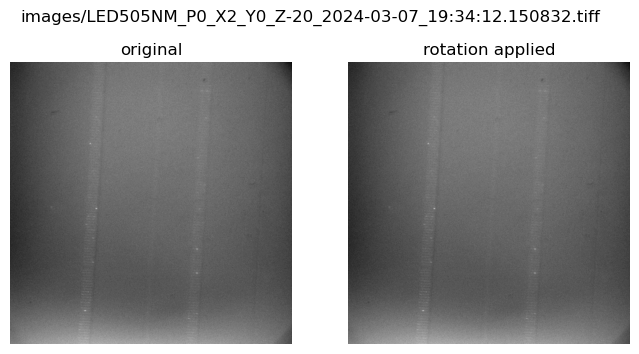

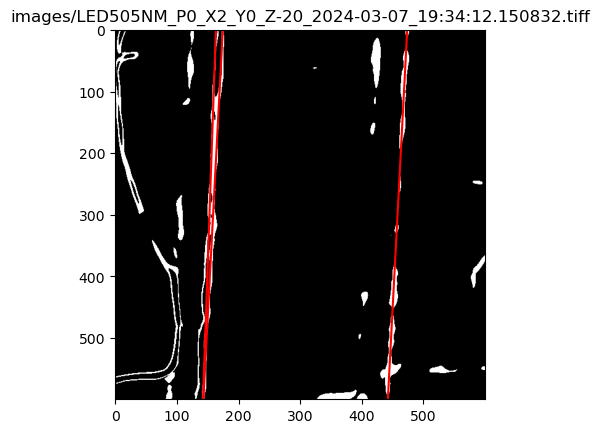

<Figure size 640x480 with 0 Axes>

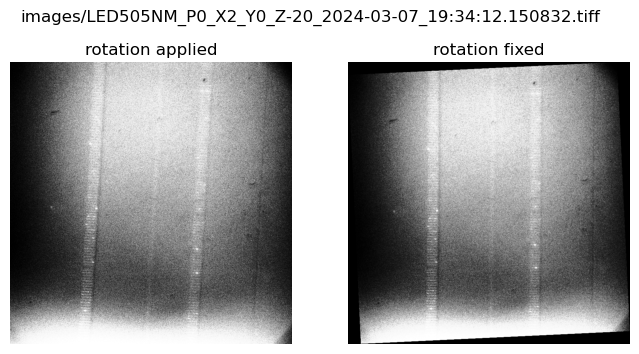

<Figure size 640x480 with 0 Axes>

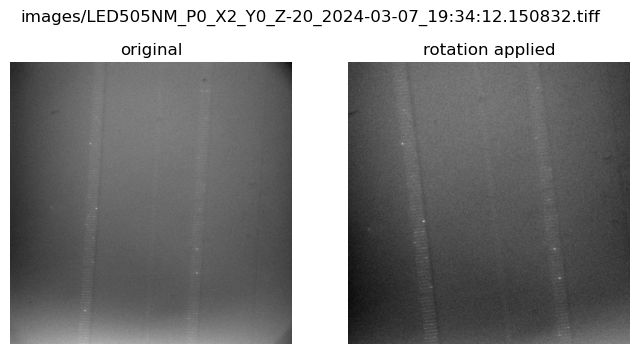

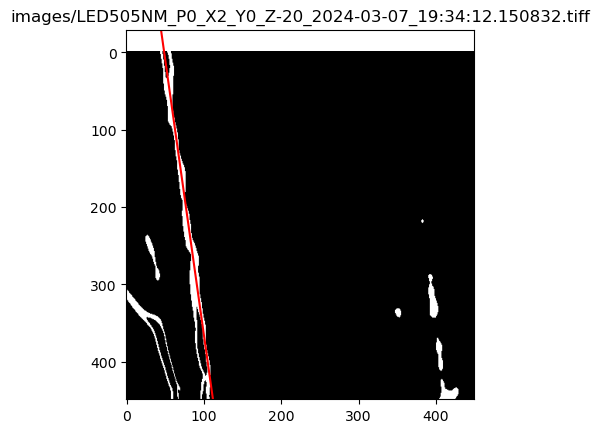

<Figure size 640x480 with 0 Axes>

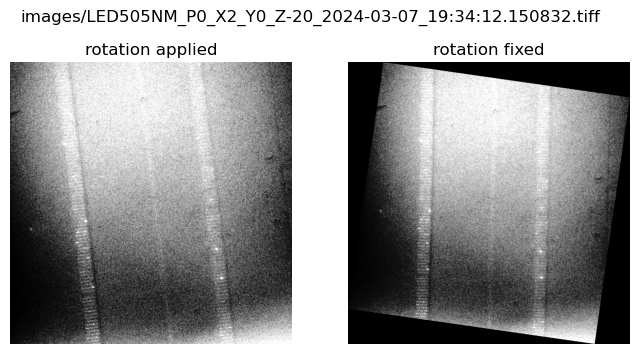

<Figure size 640x480 with 0 Axes>

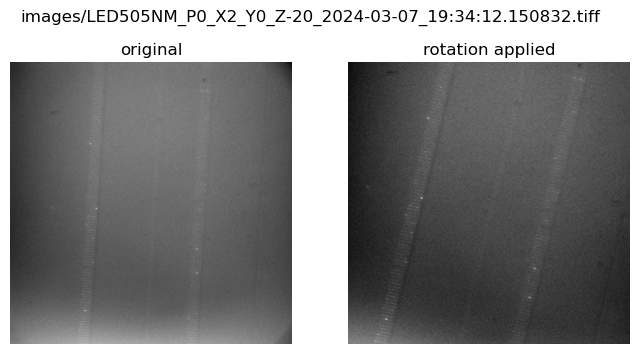

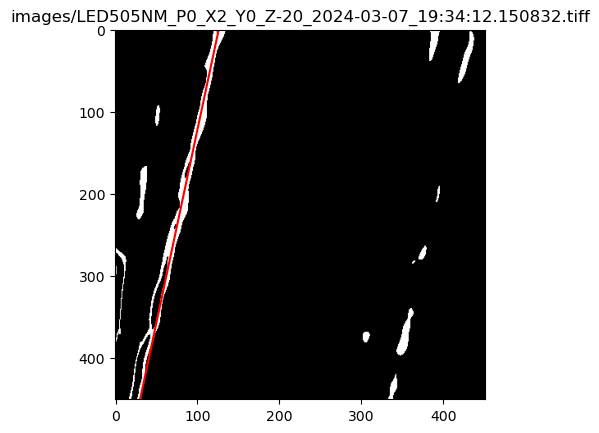

<Figure size 640x480 with 0 Axes>

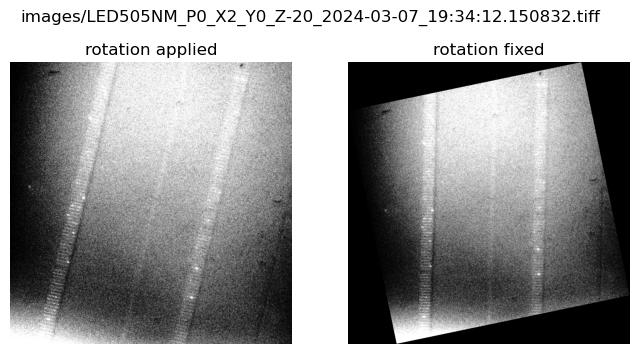

<Figure size 640x480 with 0 Axes>

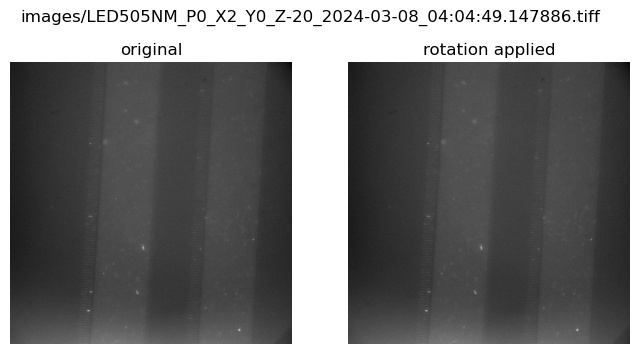

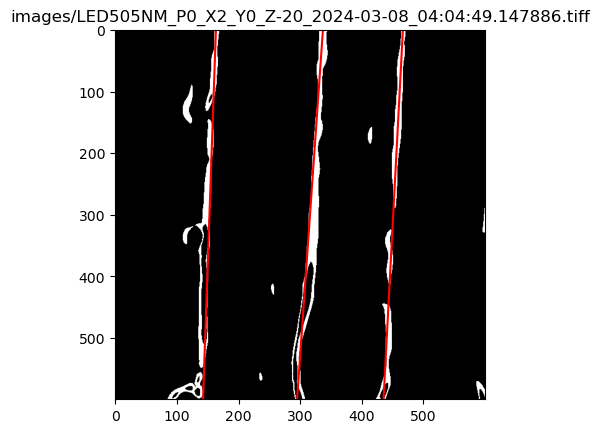

<Figure size 640x480 with 0 Axes>

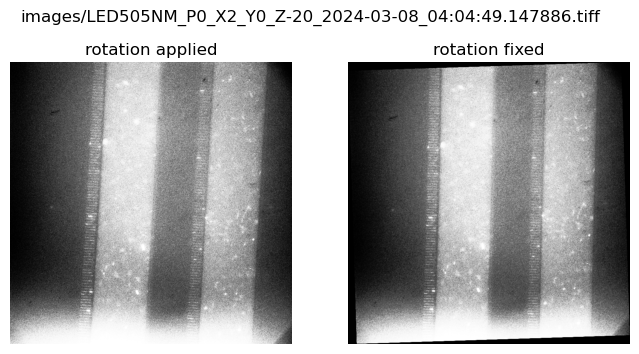

<Figure size 640x480 with 0 Axes>

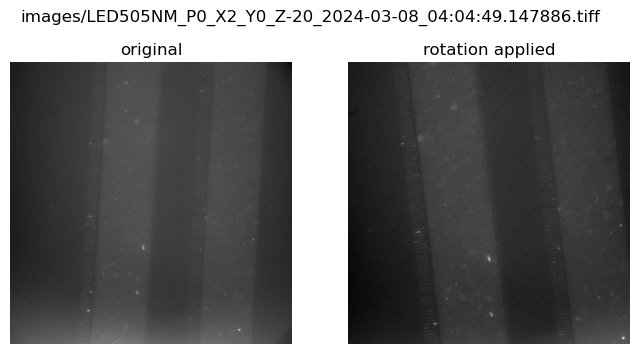

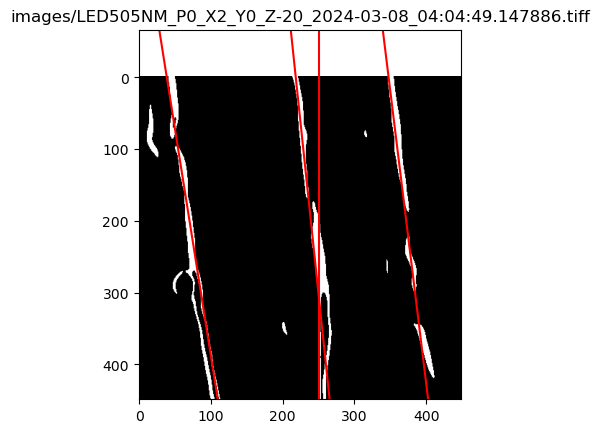

<Figure size 640x480 with 0 Axes>

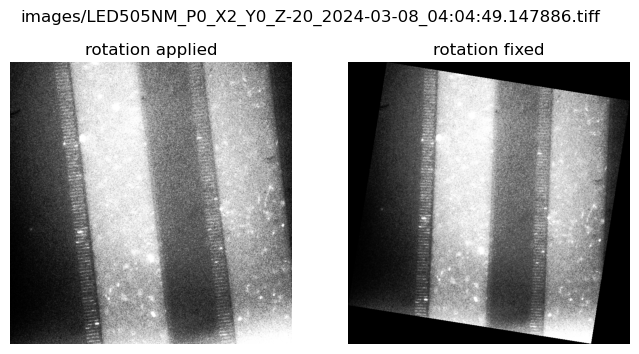

<Figure size 640x480 with 0 Axes>

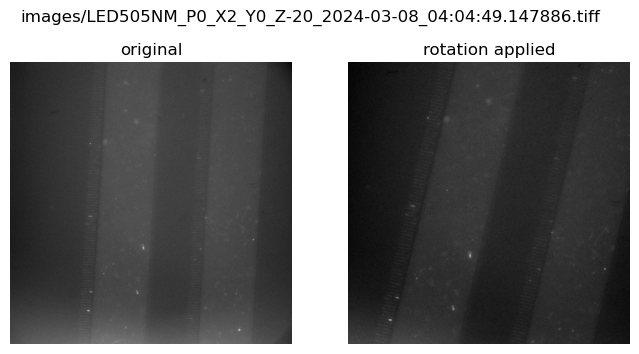

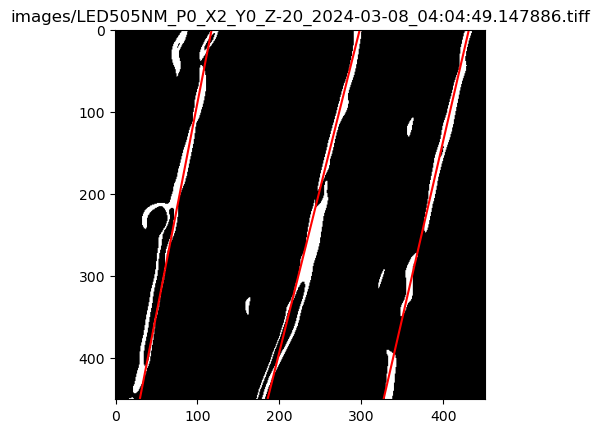

<Figure size 640x480 with 0 Axes>

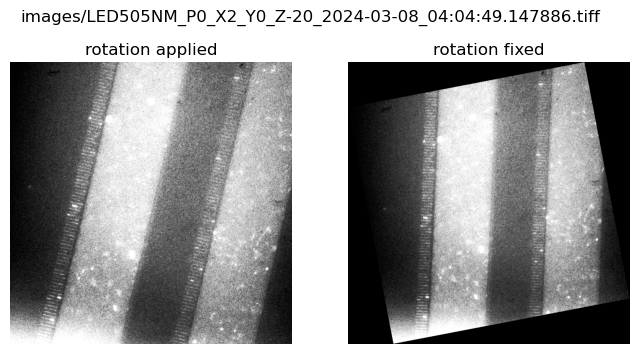

<Figure size 640x480 with 0 Axes>

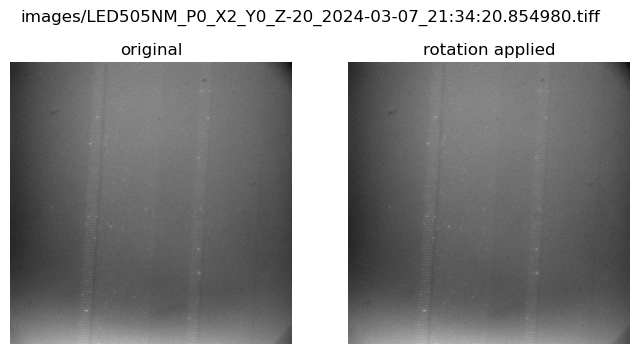

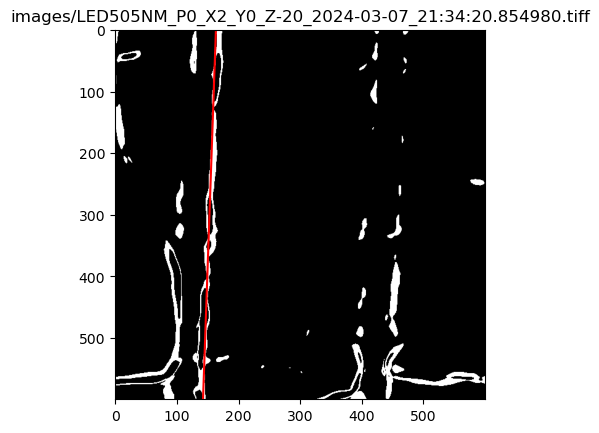

<Figure size 640x480 with 0 Axes>

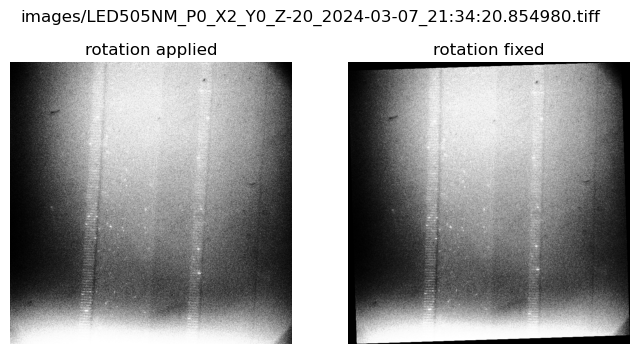

<Figure size 640x480 with 0 Axes>

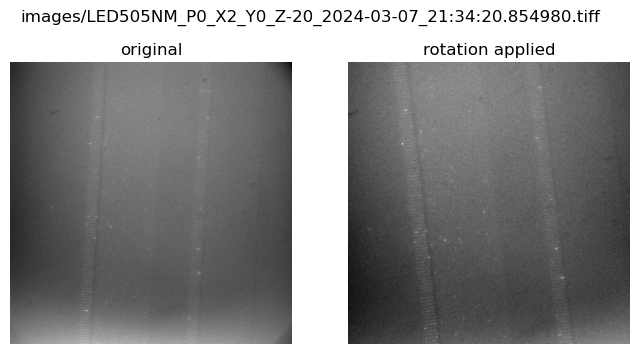

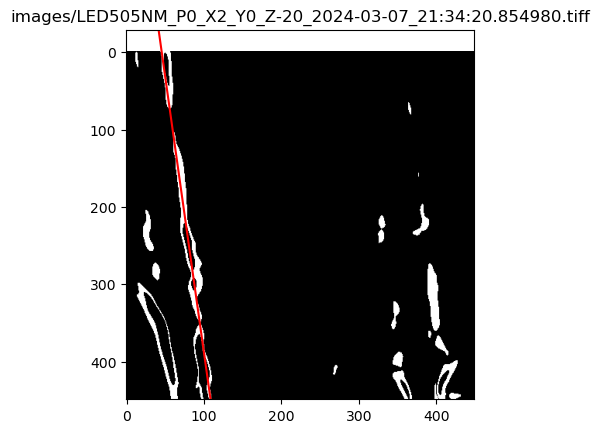

<Figure size 640x480 with 0 Axes>

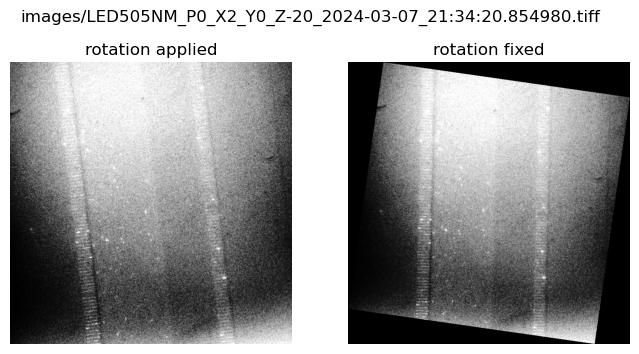

<Figure size 640x480 with 0 Axes>

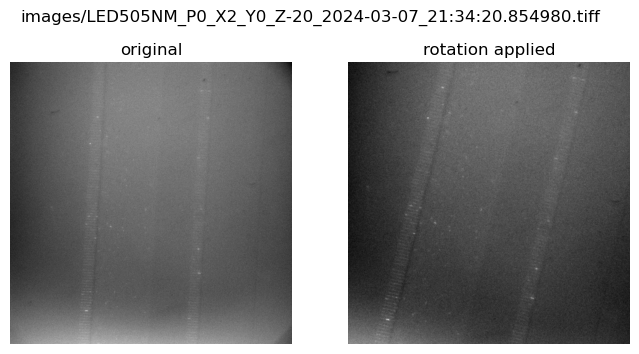

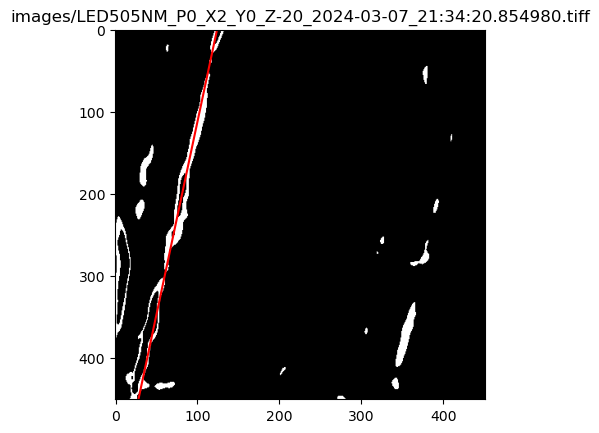

<Figure size 640x480 with 0 Axes>

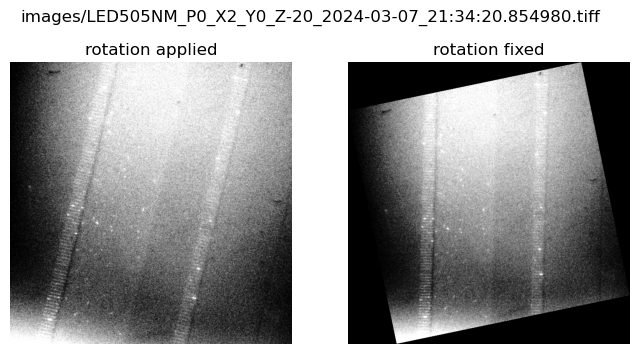

<Figure size 640x480 with 0 Axes>

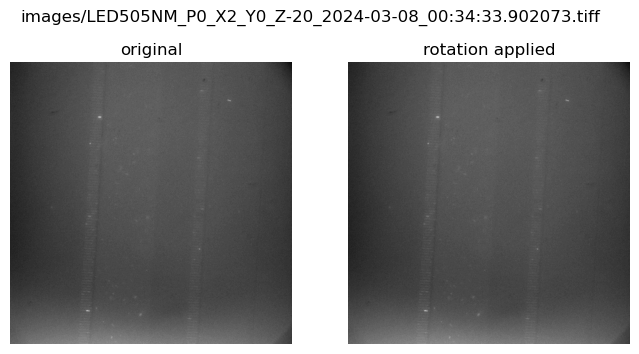

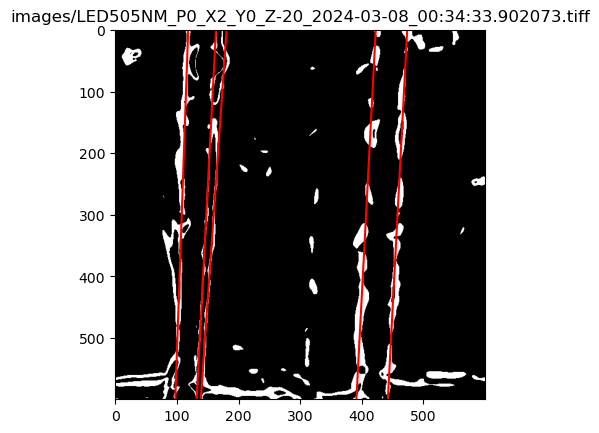

<Figure size 640x480 with 0 Axes>

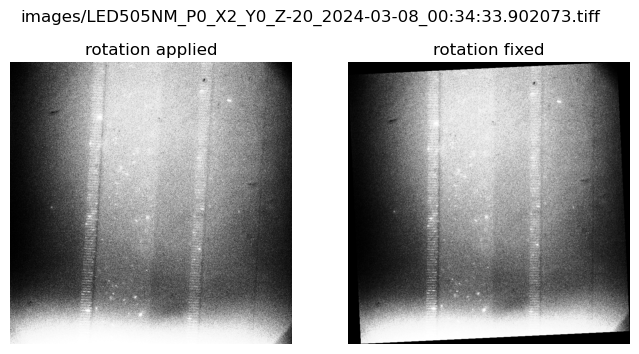

<Figure size 640x480 with 0 Axes>

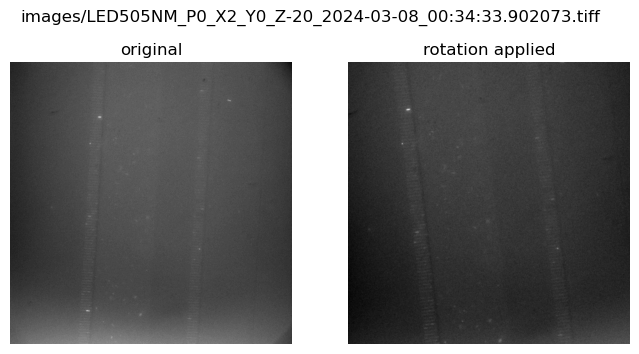

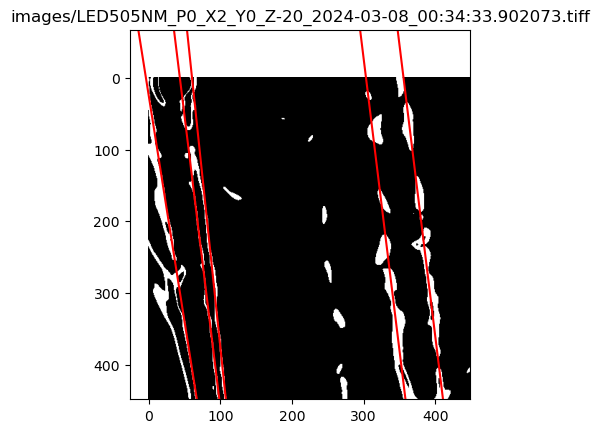

<Figure size 640x480 with 0 Axes>

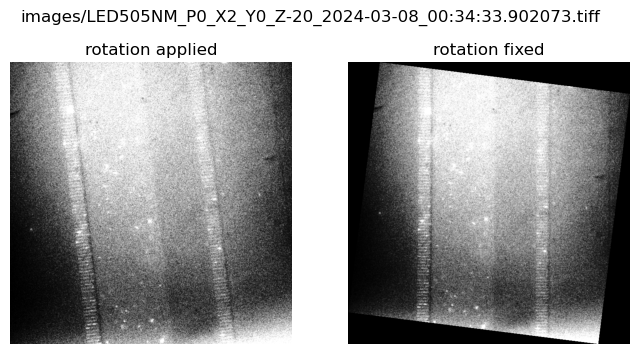

<Figure size 640x480 with 0 Axes>

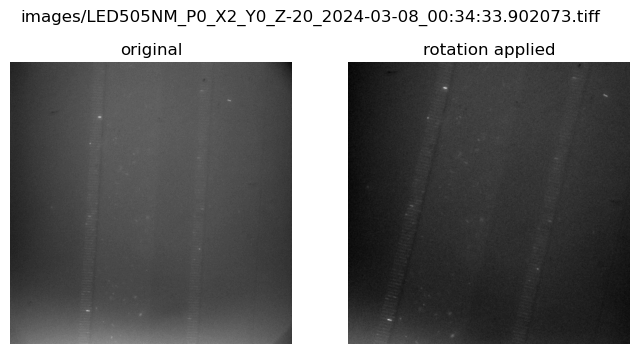

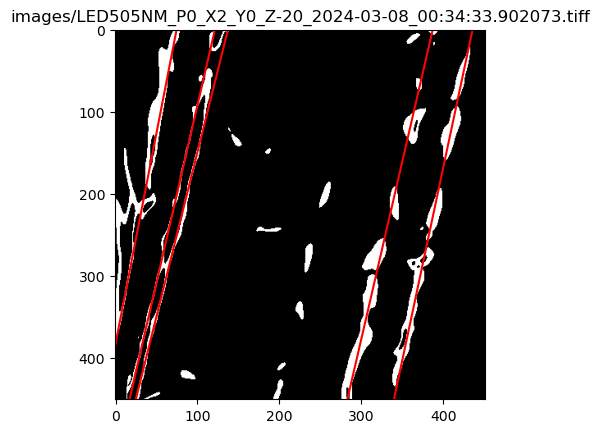

<Figure size 640x480 with 0 Axes>

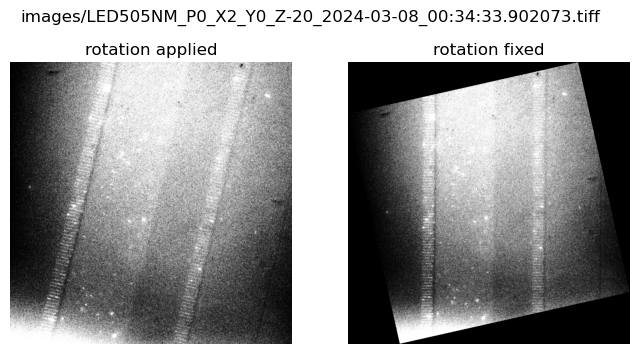

<Figure size 640x480 with 0 Axes>

In [294]:
plt.close('all')
for i in range(0, len(images), 5):
    manual_rotate_then_deskew(images[i], 0)
    manual_rotate_then_deskew(images[i], 10)
    manual_rotate_then_deskew(images[i], -10)